In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글폰트 사용을 위한 설정(Window)
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
# matplotlib.rc 또는 plt.rc 모두 가능
matplotlib.rc('font', family=font_name)

In [3]:
df = pd.read_csv('../data/01_raw/train.csv')

In [4]:
# churn, international_plan, voice_mail_plan -> yes: 1, no: 0 변환
df['churn'] = (df['churn'] == 'yes').astype(int)
df['international_plan'] = (df['international_plan'] == 'yes').astype(int)
df['voice_mail_plan'] = (df['voice_mail_plan'] == 'yes').astype(int)


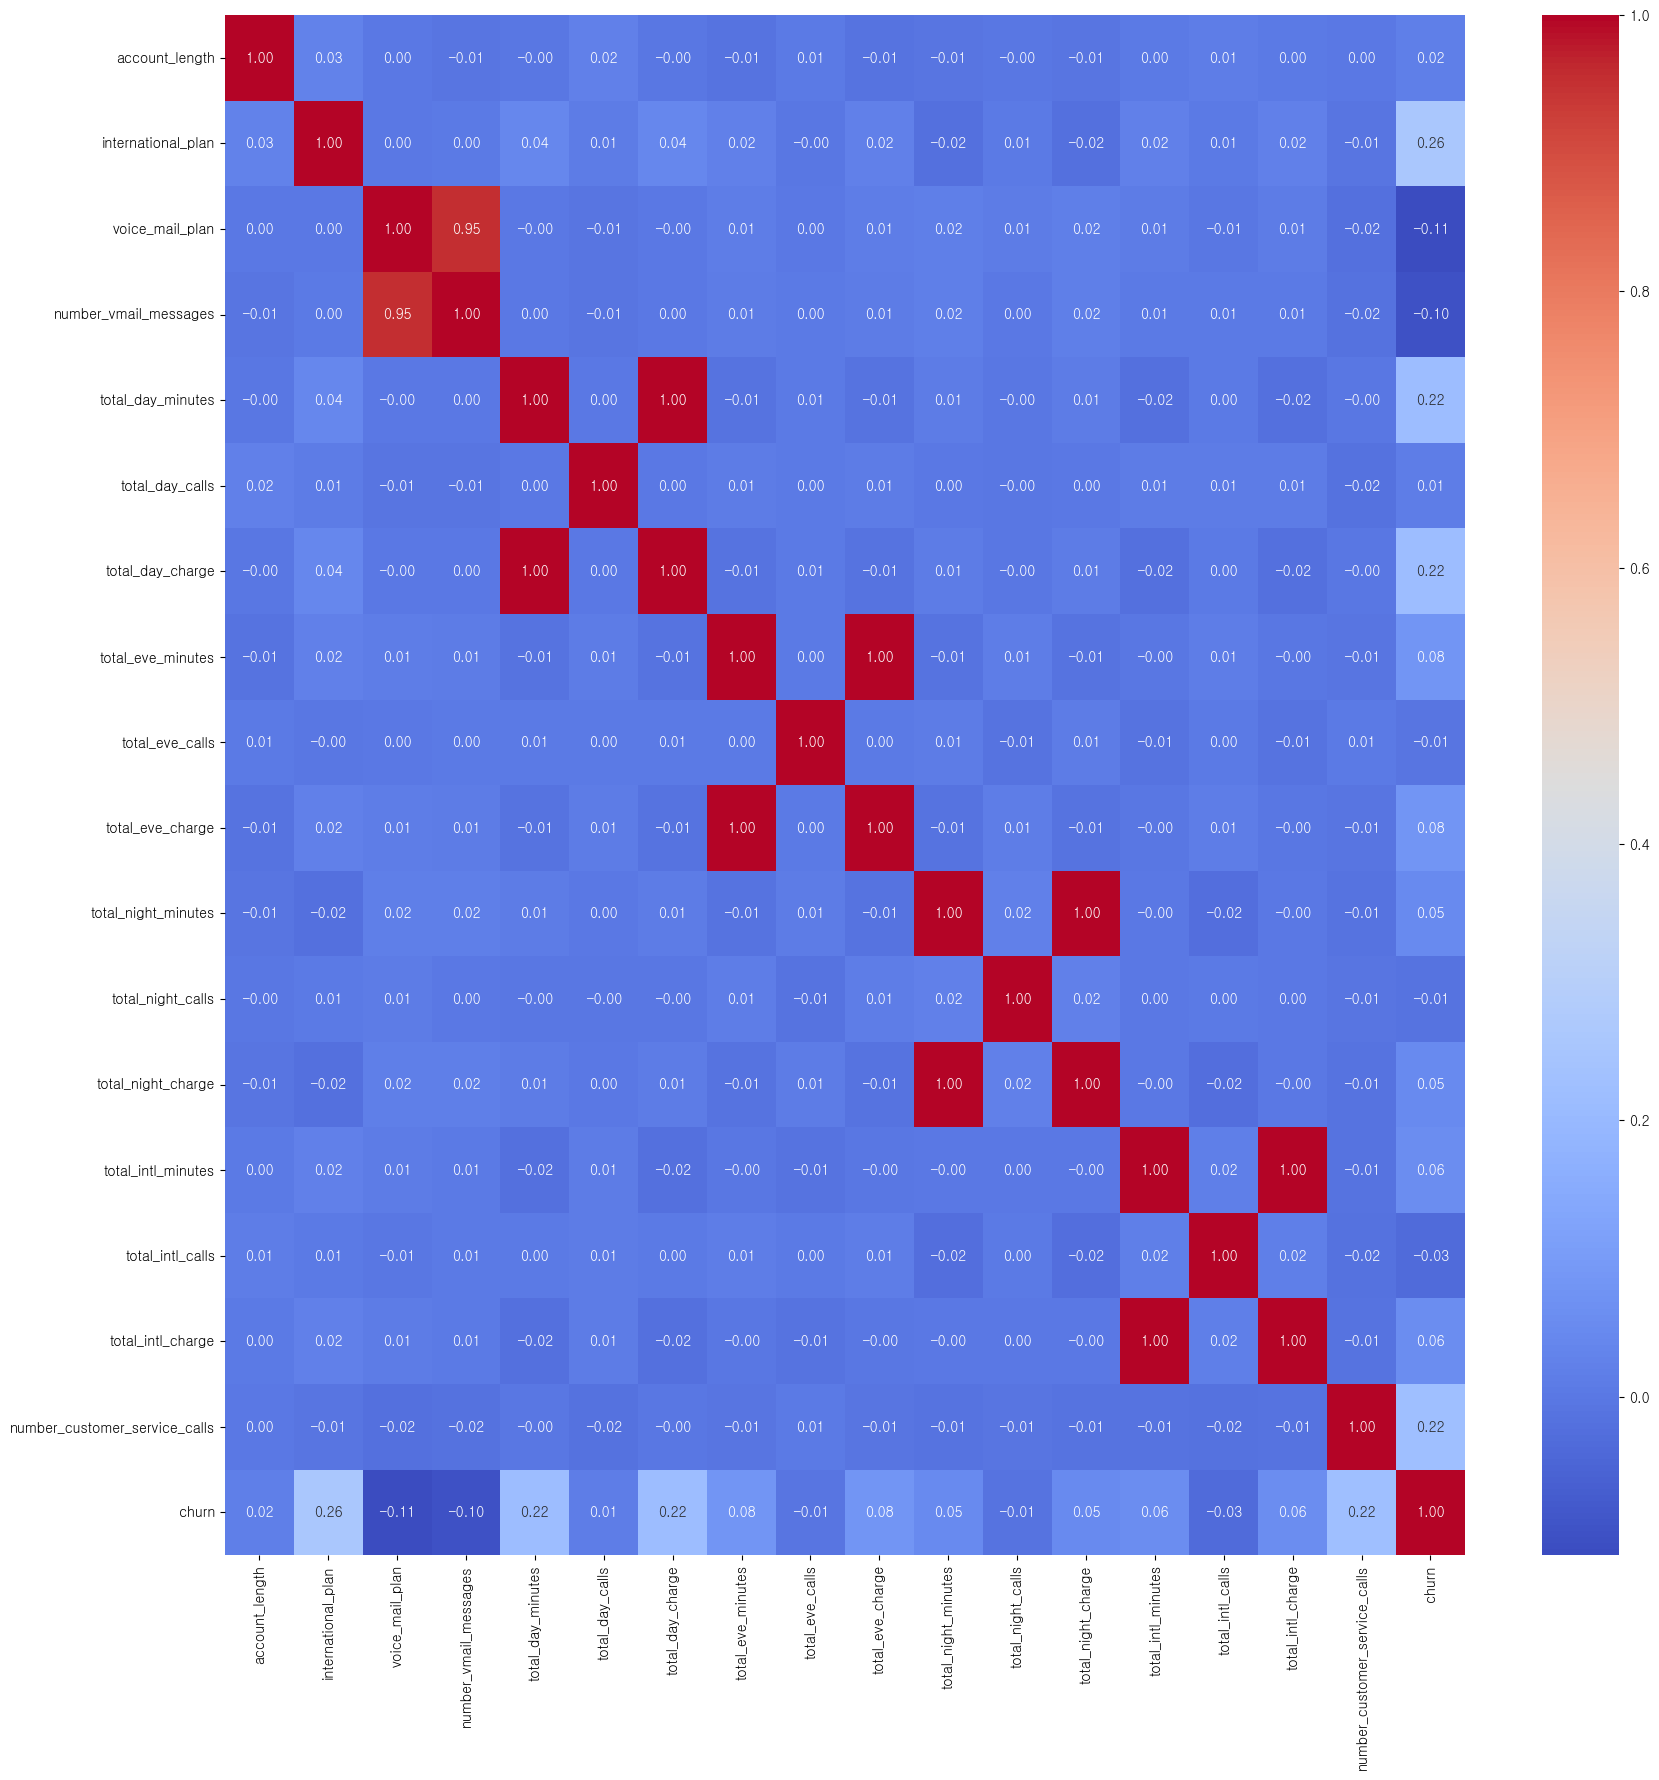

In [5]:
corr_df = df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, fmt='.2f', annot=True,cmap='coolwarm')  # annot 박스 안에 수치 넣을지 
plt.show()

In [6]:
# a = df.groupby('bill_group', observed=False)['bill_group'].count()
# a

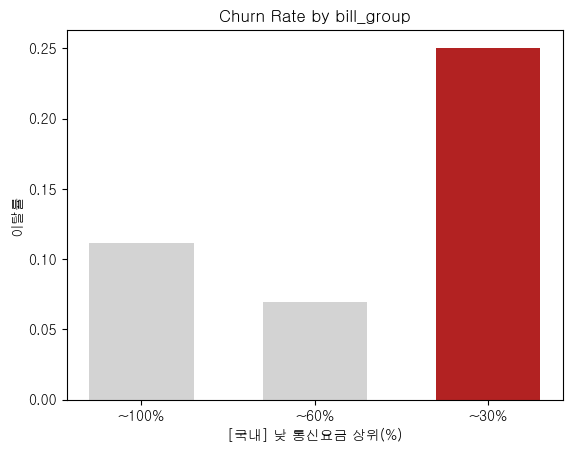

In [7]:
# 1. 🚨 VIP 전담 케어 (Highest Priority)
# 4. 💰 요금 할인 쿠폰 발송 (Price Sensitive)
# day 요금 관련 그래프 
q2 = df['total_day_charge'].quantile(0.4)
q3 = df['total_day_charge'].quantile(0.7)

# pd.cut(): 구간별로 구분하는 함수 
df['bill_group'] = pd.cut(
    df['total_day_charge'],
    bins=[0, q2, q3, 10000],
    labels=['~100%', '~60%','~30%'],
    right=True, 
)
    
bill_df = df.groupby('bill_group', observed=False)['churn'].mean()

x = bill_df.index       
y = bill_df.values      
color = ['lightgray','lightgray','firebrick']

plt.bar(x, y, color=color, width=0.6)
plt.xlabel('[국내] 낮 통신요금 상위(%)')
plt.ylabel('이탈률')
plt.title('Churn Rate by bill_group')
plt.show()


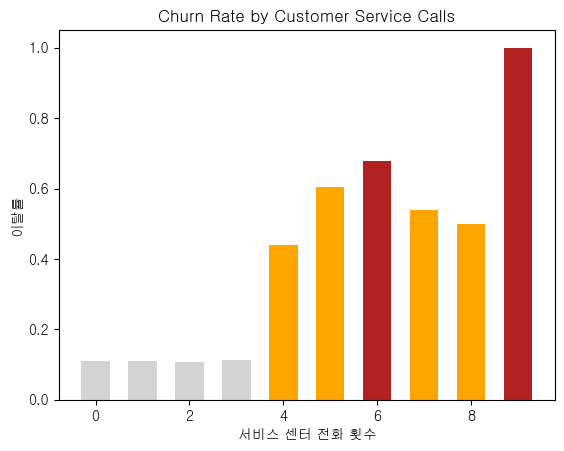

In [8]:
# 2. 📞 불만 전담 마크 (CS Care)
# number_customer_service_calls 별 이탈확률
# service_call이 높을수록 이탈확률이 높다
dissatisfaction_df = df.groupby('number_customer_service_calls')['churn'].mean()

x = dissatisfaction_df.index         
y = dissatisfaction_df.values        
color = ['lightgray','lightgray','lightgray','lightgray',
        'orange', 'orange','firebrick','orange','orange','firebrick']

plt.bar(x, y, color=color, width=0.6)
plt.xlabel('서비스 센터 전화 횟수')
plt.ylabel('이탈률')
plt.title('Churn Rate by Customer Service Calls')
plt.show()

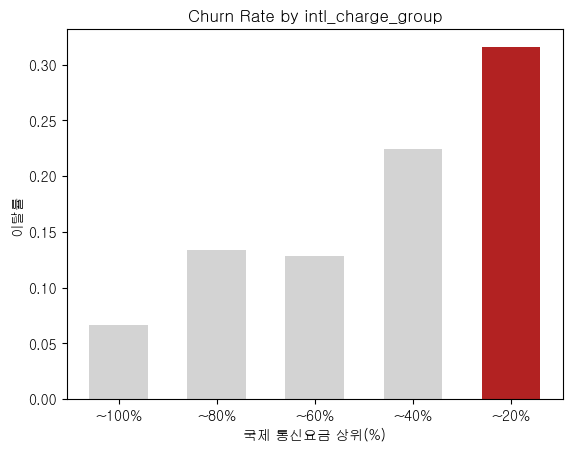

In [9]:
# 3. 🌍 국제전화 요금제 제안:
# pd.cut(): 구간별로 구분하는 함수 
df['intl_charge_group'] = pd.cut(
    df['total_intl_charge'],
    bins=[0, 1.2, 2.4, 3.6, 4.5, 6],
    labels=['~100%', '~80%', '~60%','~40%','~20%'],
    right=True, 
)
    

sample_df = df.groupby('intl_charge_group', observed=False)['churn'].mean()

sample_df.values
x = sample_df.index       
y = sample_df.values      
color = ['lightgray','lightgray','lightgray','lightgray','firebrick']

plt.bar(x, y, color=color, width=0.6)
plt.xlabel('국제 통신요금 상위(%)')
plt.ylabel('이탈률')
plt.title('Churn Rate by intl_charge_group')
plt.show()


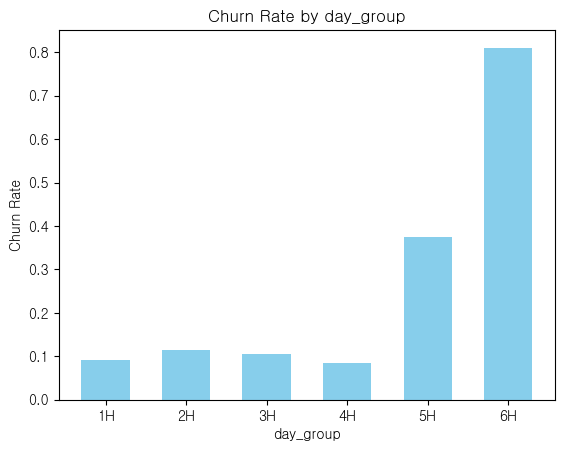

In [10]:
# 주간 전화 시간별 시각화

# pd.cut(): 구간별로 구분하는 함수 
df['day_group'] = pd.cut(
    df['total_day_minutes'],
    bins=[0, 60, 120, 180, 240, 300, 360],
    labels=['1H','2H','3H','4H','5H','6H'],
    right=True, # 오른쪽 기준 값을 포함하지 않음 / True는 오른쪽 값을 포함함, 기본값임
)

# -------------------------------------------------------------
sample_df = df.groupby('day_group', observed=False)['churn'].mean()


# plt.bar(sample_df.index, sample_df.values)
sample_df.values
x = sample_df.index         # 인덱스
y = sample_df.values        # 값

plt.bar(x, y, color='skyblue', width=0.6)
plt.xlabel('day_group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by day_group')
plt.show()




<Axes: xlabel='international_plan', ylabel='count'>

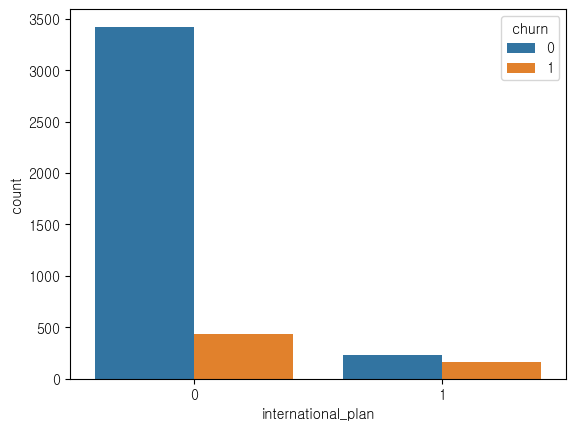

In [11]:
# 이탈률 확인
sns.countplot(
    data=df,
    x='international_plan',
    hue='churn'
)

<Axes: xlabel='number_customer_service_calls', ylabel='count'>

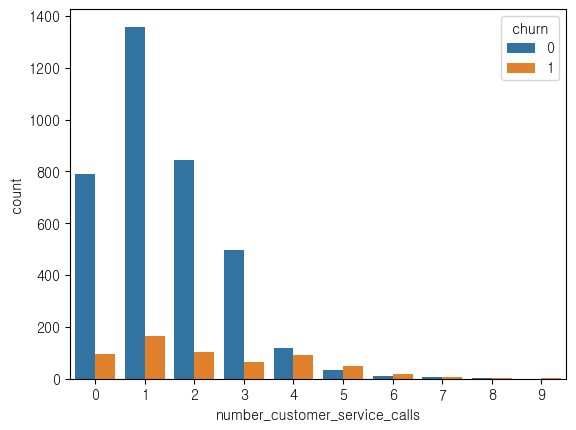

In [12]:
sns.countplot(
    data=df,
    x='number_customer_service_calls',
    hue='churn'
)

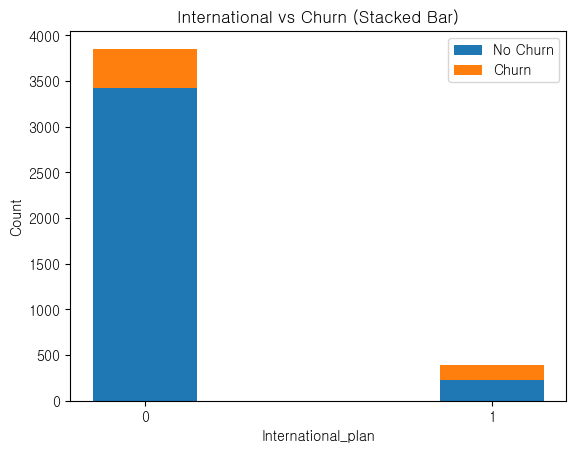

In [13]:
ct = pd.crosstab(df['international_plan'], df['churn'])
x = ct.index                 # international 값
churn_0 = ct[0].values       # churn = 0
churn_1 = ct[1].values       # churn = 1

plt.bar(x, churn_0, label='No Churn', width=0.3)
plt.bar(x, churn_1, bottom=churn_0, label='Churn', width=0.3)

plt.xlabel('International_plan')
plt.ylabel('Count')
plt.title('International vs Churn (Stacked Bar)')
plt.xticks([0, 1], [0, 1])
plt.legend()
plt.show()

In [15]:
# 고객센터 4회 이탈한 고객들의 요금 평균
# 국제 전화를 통화하는 사람들의 이탈한 사람들의 요금 평균을 비교해서 회사가 어디에 포커스를 해야하는지 확인하는 그래프 
df.head()
# 1. 4회 이상 전화한 사람들의 total bill의 총합
df2 = df[df['number_customer_service_calls'] >= 4]
df3 = df2[df2['churn'] == 1]
print(df3['total_bill'].sum())
print(df3['total_bill'].count())

# 국제 전화 통신 international_plan 하는 사람중 이탈한 사람의 요금 합
df2 = df[df['international_plan'] == 1]
df3 = df2[df2['churn'] == 1]
print(df3['total_bill'].sum())
print(df3['total_bill'].count())

KeyError: 'total_bill'

In [16]:
df2 = df[df['churn'] == 1]
df2.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,bill_group,intl_charge_group,day_group
8,IN,65,area_code_415,0,0,0,129.1,137,21.95,228.5,...,111,9.40,12.7,6,3.43,4,1,~100%,~60%,3H
12,NY,161,area_code_415,0,0,0,332.9,67,56.59,317.8,...,128,7.23,5.4,9,1.46,4,1,~30%,~80%,6H
17,CO,77,area_code_408,0,0,0,62.4,89,10.61,169.9,...,64,9.43,5.7,6,1.54,5,1,~100%,~80%,2H
26,AZ,12,area_code_408,0,0,0,249.6,118,42.43,252.4,...,90,12.61,11.8,3,3.19,1,1,~30%,~60%,5H
32,MD,135,area_code_408,1,1,41,173.1,85,29.43,203.9,...,78,5.50,14.6,15,3.94,0,1,~60%,~40%,3H


In [17]:
 
x = []
for i in range(4, 10):
    xi_df = df2[df2['number_customer_service_calls'] == i]
    x.append(xi_df['total_bill'].sum())

x = [float(v) for v in x]

df3 = df2[df2['intl_charge_group'] == '~20%']
y = df3['total_bill'].sum()

x.append(y.item())

index = ['4회','5회','6회','7회','8회','9회','국제요금 상위 20%']
df_x = pd.DataFrame({'total_bill_sum': x}, index = index)
df_x

plt.bar(df_x.index, df_x['total_bill_sum'])
plt.show()



KeyError: 'total_bill'

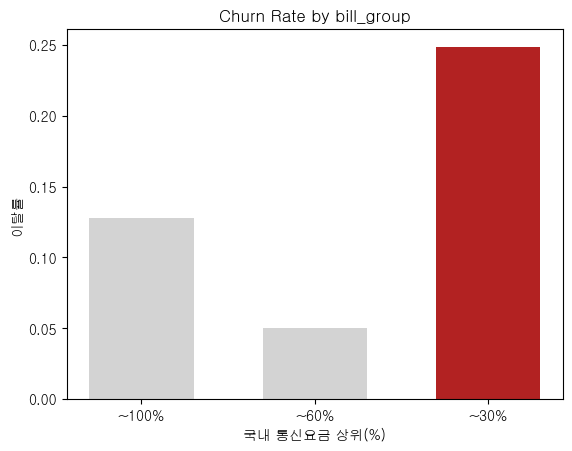

In [ ]:
# 1. 🚨 VIP 전담 케어 (Highest Priority)
# 4. 💰 요금 할인 쿠폰 발송 (Price Sensitive)

df['total_bill'] = (
    df['total_day_charge'] + 
    df['total_eve_charge'] + 
    df['total_night_charge'] + 
    df['total_intl_charge']
)
# q1 = df['total_bill'].quantile(0.1)
q2 = df['total_bill'].quantile(0.4)
q3 = df['total_bill'].quantile(0.7)

# pd.cut(): 구간별로 구분하는 함수 
df['bill_group'] = pd.cut(
    df['total_bill'],
    bins=[0, q2, q3, 10000],
    labels=['~100%', '~60%','~30%'],
    right=True, 
)
    
bill_df = df.groupby('bill_group', observed=False)['churn'].mean()

x = bill_df.index       
y = bill_df.values      
color = ['lightgray','lightgray','firebrick']

plt.bar(x, y, color=color, width=0.6)
plt.xlabel('국내 통신요금 상위(%)')
plt.ylabel('이탈률')
plt.title('Churn Rate by bill_group')
plt.show()